In [1]:
import pandas as pd
import numpy as np

In [6]:
path_data="../Data/"

In [7]:
df=pd.read_csv(path_data+"train.csv")

In [9]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [13]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.__version__

'0.9.0'

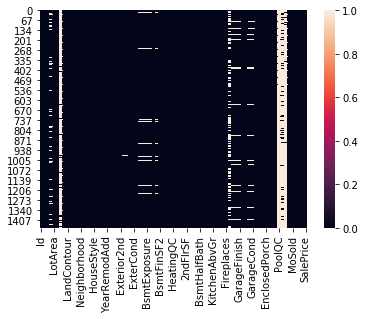

In [19]:
sns.heatmap(df.isnull(), cbar=True)

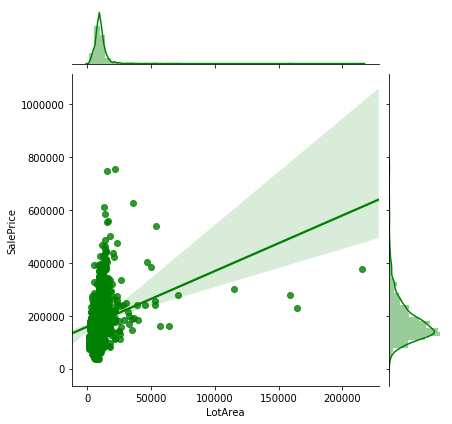

In [20]:
sns.jointplot(data=df, x='LotArea', y='SalePrice', kind='reg', color='g')
plt.show()

#howtoloop?

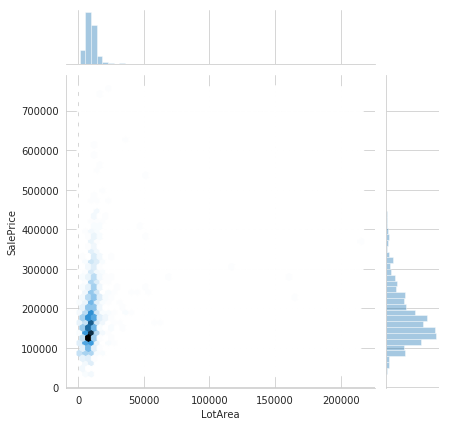

In [35]:
with sns.axes_style('whitegrid'):
    sns.jointplot("LotArea", "SalePrice", df, kind='hex')

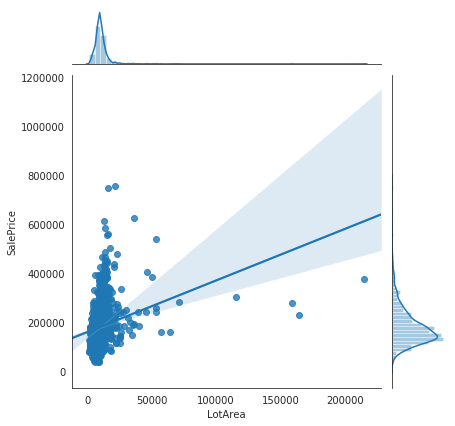

In [36]:
with sns.axes_style('white'):
    sns.jointplot("LotArea", "SalePrice", df, kind='reg')

In [50]:
type(df.isnull().sum().sort_values(ascending=False))

pandas.core.series.Series

### Plot missing value

**Step**:
1. Count missing value
** df.isnull().sum().sort_values(ascending=False) **
2. Get X and Y in point  1
** X -> index.tolist() **
** Y -> values **
3. Plot, if too much variables, you can delete variables not missing
** df.isnull().sum().sort_values(ascending=False) ---> data = data[data != 0] **

In [84]:
import matplotlib.pyplot as plt

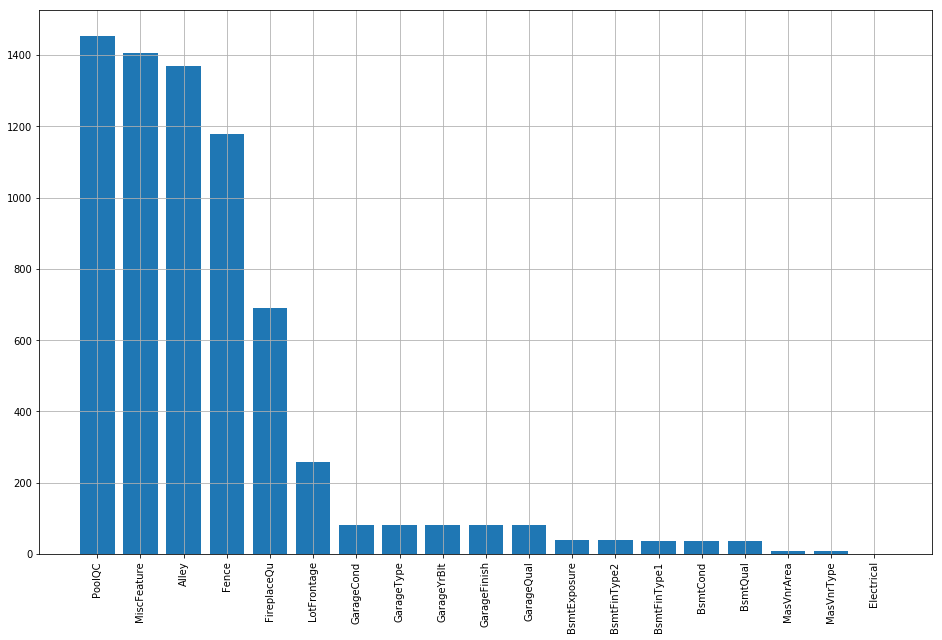

In [85]:
plot = df.isnull().sum().sort_values(ascending=False)
plot= data[data != 0]

x = plot.index.tolist()
y = plot.values 

plt.bar(x,y)

plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [62]:
from sklearn.preprocessing import Imputer
variable_dtypes = (pd.DataFrame(df.dtypes))
variable_dtypes = variable_dtypes.reset_index()
variable_dtypes = variable_dtypes.rename(columns ={'index':'Feature',0:'Datatype'})
variable_dtypes.Datatype.value_counts()

rcParams['figure.figsize'] = 9,6

In [75]:
variable_dtypes.Datatype.value_counts()

object     43
int64      35
float64     2
Name: Datatype, dtype: int64

In [74]:
variable_dtypes.Feature

0                Id
1        MSSubClass
2          MSZoning
3       LotFrontage
4           LotArea
5            Street
6             Alley
7          LotShape
8       LandContour
9         Utilities
10        LotConfig
11        LandSlope
12     Neighborhood
13       Condition1
14       Condition2
15         BldgType
16       HouseStyle
17      OverallQual
18      OverallCond
19        YearBuilt
20     YearRemodAdd
21        RoofStyle
22         RoofMatl
23      Exterior1st
24      Exterior2nd
25       MasVnrType
26       MasVnrArea
27        ExterQual
28        ExterCond
29       Foundation
          ...      
50         HalfBath
51     BedroomAbvGr
52     KitchenAbvGr
53      KitchenQual
54     TotRmsAbvGrd
55       Functional
56       Fireplaces
57      FireplaceQu
58       GarageType
59     GarageFinish
60       GarageCars
61       GarageArea
62       GarageQual
63       GarageCond
64       PavedDrive
65       WoodDeckSF
66      OpenPorchSF
67    EnclosedPorch
68        3SsnPorch


In [66]:
numerical_variables_filter = (variable_dtypes[variable_dtypes.Datatype !='object'].Feature)

# GarageYrBlt has 81 missing values
df[numerical_variables_filter].isnull().sum()

# # YearBuilt and GarageYrBlt are highly correlated. GarageYrBlt will be dropped
numerical_variables_filter = numerical_variables_filter.drop(numerical_variables_filter.index[24])
# df = df.drop(['GarageYrBlt'],axis=1)

# Fill in remaining missing values with mean
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
df[numerical_variables_filter] = imputer.fit_transform(df[numerical_variables_filter])

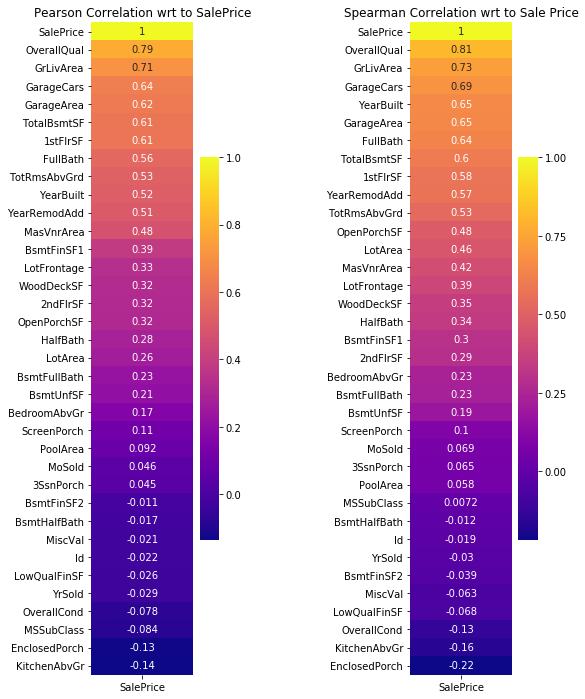

In [67]:
from pylab import rcParams
import seaborn as sb
rcParams['figure.figsize'] = 8,12

plt.subplot(1,2,1)
sb.heatmap(pd.DataFrame(df[numerical_variables_filter].corr(method='pearson').SalePrice).sort_values(by=['SalePrice'],ascending=False),cmap='plasma',annot=True)
plt.title('Pearson Correlation wrt to SalePrice')

plt.subplot(1,2,2)
sb.heatmap(pd.DataFrame(df[numerical_variables_filter].corr(method='spearman').SalePrice).sort_values(by=['SalePrice'],ascending=False),cmap='plasma',annot=True)
plt.title('Spearman Correlation wrt to Sale Price')

plt.subplots_adjust(wspace=1.5)

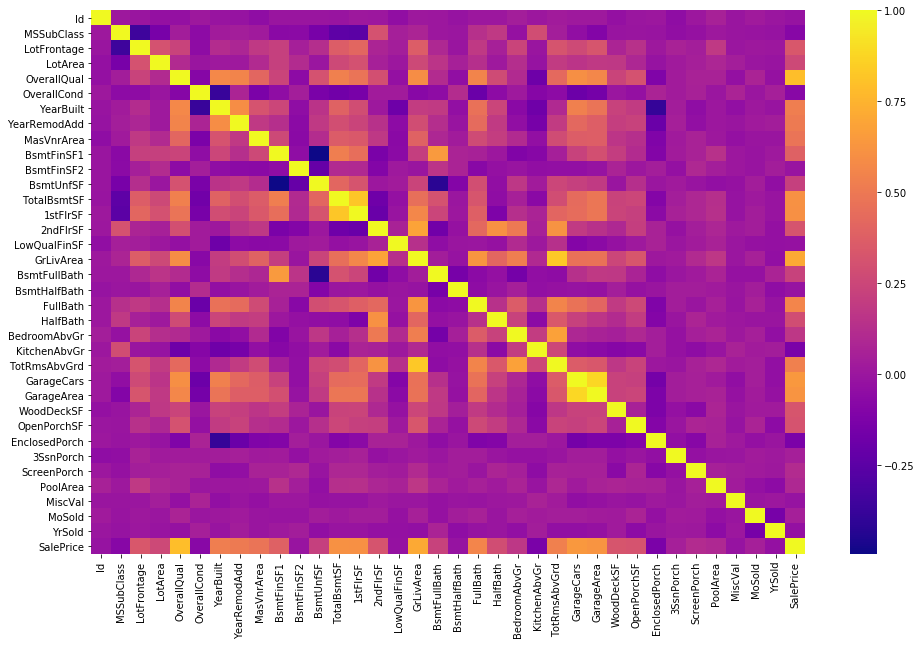

In [79]:
rcParams['figure.figsize'] = 16,10
sb.heatmap(df[numerical_variables_filter].corr(method='pearson'),cmap='plasma')